# Introduction of Tensorflow


* TensorFlow is an interface for expressing machine learning algorithms, and an implementation for executing such algorithms. A computation expressed using TensorFlow can be executed with little or no change on a wide variety of heterogeneous systems, ranging from mobile devices such as phones and tablets up to large-scale distributed systems of hundreds of machines and thousands of computational devices such as GPU cards. The system is flexible and can be used to express a wide variety of algorithms, including training and inference algorithms for deep neural network models, and it has been used for conducting research and for deploying machine learning systems into production across more than a dozen areas of computer science and other fields, including speech recognition, Computer vision, robotics, information retrieval, natural language processing, geographic information extraction, and computational drug discovery.

# Section - 1.0 Tensorflow basic

* 1. What is Tensor?
* Tensorflow's name is directly derived from its core framework: Tensor. In Tensorflow, all the computations involve tensors.
* A tensor is a vector or matrix of n-dimensions that represents all types of data. All values in a tensor hold identical data type with a known (or partially known) shape.
* The shape of the data is the dimensionality of the matrix or array.

# 2.0 Representation of a Tensor

* In TensorFlow, a tensor is a collection of feature vectors (i.e., array) of n-dimensions.
* For instance, if we have a 2x3 matrix with values from 1 to 6, we write:

In TensorFlow, all the computations pass through one or more tensors. A tensor is an object with three properties:
* A unique label (name)
* A dimension (shape)
* A data type (dtype)

# 3.0 Operation that doing in Tensorflow

TensorFlow involves the manipulation of a tensor. There are four main tensors you can create:
* tf.Variable
* tf.constant
* tf.placeholder
* tf.SparseTensor

The edges are the tensors, the nodes represent the graph, and the graph go to a session

# 3.1 tf.varible

* A TensorFlow variable is the best way to represent shared, persistent state manipulated by your program.
* Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running ops on it. Unlike[tf.Variable]tf.Variable objects, atf.Variable exists outside the context of a single session.run call.
* Internally, a tf.Variable stores a persistent tensor. Specific ops allow you to read and modify the values of this tensor. These modifications are visible across multiple tf.Sessions, so multiple workers can see the same values for a tf.Variable.

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11997167171679271160
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3163724185
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5868961894374790814
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import tensorflow as tf

var = tf.Variable(0) # our first variable in the 'global_variable' set

In [3]:
add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)

with tf.Session() as sess:
    # once define variables, you have to initialize them by doing this
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

1
2
3


# 3.2 tf.constant

In [4]:
tf.constant(
    [[10,5], [10,5]],
    dtype = None,
    shape = None,
    name = 'Const',
    verify_shape = False)

<tf.Tensor 'Const:0' shape=(2, 2) dtype=int32>

* Creates a constant tensor.
* The resulting tensor is populated with values of type dtype, as specified by arguments value and (optionally) shape.
* The argument value can be a constant value, or a list of values of type dtype. If value is a list, then the length of the list must be less than or equal to the number of elements implied by the shape argument (if specified). In the case where the list length is less than the number of elements specified by shape, the last element in the list will be used to fill the remaining entries.
* The argument shape is optional. If present, it *specifies the dimensions of the resulting tensor. If not present, the shape of value is used.
* If the argument dtype is not specified, then the type is inferred from the type of value.

In [5]:
# Constant 1-D Tensor populated with value list.
tensor_1 = tf.constant([1, 2, 3, 4, 5, 6, 7])
print(tensor_1.shape)
# Constant 2-D tensor populated with scalar value -1.
tensor_2 = tf.constant(-1.0, shape = [2,3])
print(tensor_2.shape)

(7,)
(2, 3)


In [6]:
with tf.Session() as sess:
    print(sess.run(tensor_1))

[1 2 3 4 5 6 7]


In [7]:
with tf.Session() as sess:
    print(sess.run(tensor_2))

[[-1. -1. -1.]
 [-1. -1. -1.]]


# 3.3 Placeholder

In [8]:
tf.placeholder(float,shape=None,name=None)

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

* A placeholder has the purpose of feeding the tensor. Placeholder is used to initialize the data to flow inside the tensors. To supply a placeholder, you need to use the method feed_dict. The placeholder will be fed only within a session.
* In the next example, you will see how to create a placeholder with the method tf.placeholder. In the next session, you will learn to fed a placeholder with actual value.

In [9]:
tf.reset_default_graph() # To clear the default graph

x1 = tf.placeholder(dtype = tf.float32, shape = None) # Inserts a placeholder for a tensor that will be always fed.

y1 = tf.placeholder(dtype = tf.float32, shape = None) # Inserts a placeholder for a tensor that will be always fed.

z1 = x1 + y1 # Summation 'x1' and 'y1'

In [10]:
x2 = tf.placeholder(dtype = tf.float32, shape = [2,1]) # Inserts a placeholder for a tensor that will be always fed.

y2 = tf.placeholder(dtype = tf.float32, shape = [1, 2]) # Inserts a placeholder for a tensor that will be always fed

z2 = tf.matmul(x2, y2) # Multiplies matrix 'x2' by matrix 'y2' 

In [11]:
with tf.Session() as sess:
    # when only one operation to run
    z1_value = sess.run(z1, feed_dict = {x1 : 1, y1: 2}) # Runs operations and evaluates tensors in fetches
    
    # when run multiple operations
    z1_value, z2_value = sess.run([z1, z2], feed_dict = {
                                                x1 : 1, y1 : 2,
                                                x2 : [[2], [2]], y2 : [[3,3]]
                                                        })
    print(z1_value) # print value of z1
    print(z2_value) # print value of z2

3.0
[[6. 6.]
 [6. 6.]]


# 4.0 Session

* A class for running TensorFlow operations.
* A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

* Graph: The graph is fundamental in TensorFlow. All of the mathematical operations (ops) are performed inside a graph. You can imagine a graph as a project where every operations are done. The nodes represent these ops, they can absorb or create new tensors.

* Tensor: A tensor represents the data that progress between operations. You saw previously how to initialize a tensor. The difference between a constant and variable is the initial values of a variable will change over time.

* Session: A session will execute the operation from the graph. To feed the graph with the values of a tensor, you need to open a session. Inside a session, you must run an operator to create an output.

In [12]:
m1 = tf.constant([[2, 2]])
m2 = tf.constant([[3],[3]])
dot_operation = tf.matmul(m1, m2)
print(dot_operation) # wrong! no result

Tensor("MatMul_1:0", shape=(1, 1), dtype=int32)


In [13]:
sess = tf.Session()
result = sess.run(dot_operation)
print(result)
sess.close()

[[12]]


# 5.0 Graph

* TensorFlow depends on a genius approach to render the operation. All the computations are represented with a dataflow scheme. The dataflow graph has been developed to see to data dependencies between individual operation. Mathematical formula or algorithm are made of a number of successive operations. A graph is a convenient way to visualize how the computations are coordinated.

* The graph shows a node and an edge. The node is the representation of a operation, i.e. the unit of computation. The edge is the tensor, it can produce a new tensor or consume the input data. It depends on the dependencies between individual operation.

* The structure of the graph connects together the operations (i.e. the nodes) and how those are operation are feed. Note that the graph does not display the output of the operations, it only helps to visualize the connection between individual operations.

In [14]:
tf.reset_default_graph() # To clear the defualt graph
x = tf.get_variable('x', dtype = tf.int32, initializer = tf.constant([5]))
z = tf.get_variable('z', dtype = tf.int32, initializer = tf.constant([6]))
c = tf.constant([5], name = 'constant')
square = tf.constant([2], name = 'square')
f = tf.multiply(x, z) + tf.pow(x, square) + z + 5

In [15]:
init = tf.global_variables_initializer() # prepare to initialize all variable
with tf.Session() as sess:
    init.run() # Initialize x and y
    function_result = f.eval()
print(function_result)

[66]


# 6.0 Activation

* Sigmoid
* ReLu
* tanh
* Leaky ReLu
* Maxout
* ELU

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
tf.reset_default_graph() # To clear the default graph

In [17]:
x = np.linspace(-5, 5, 200)
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

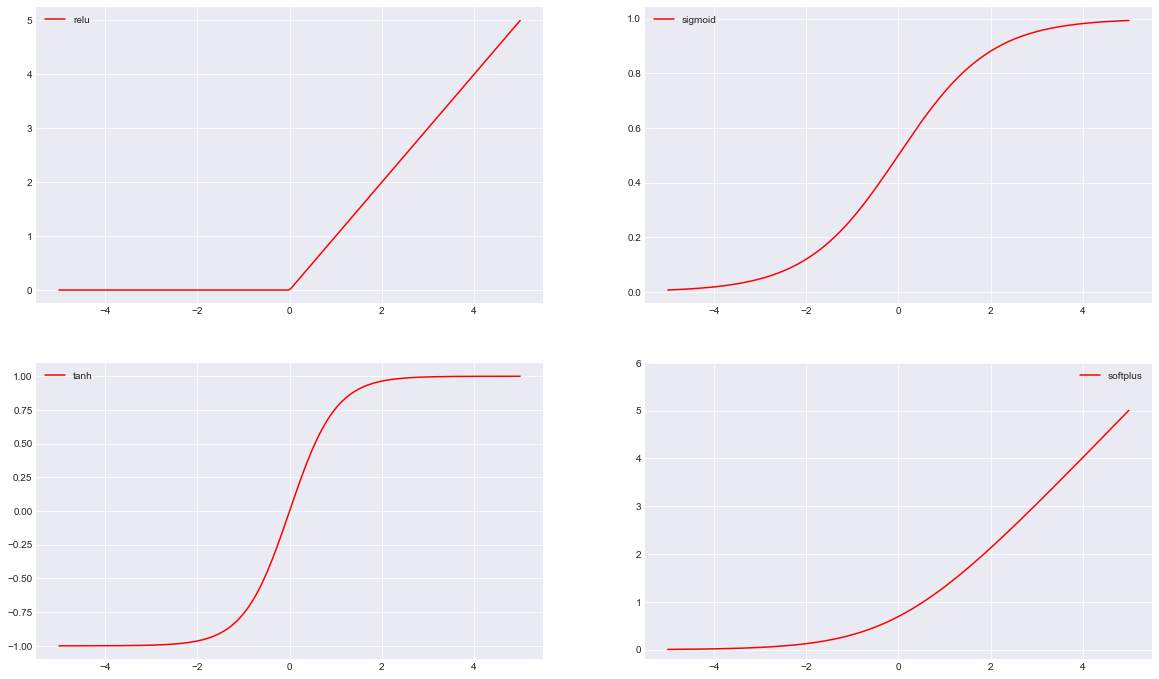

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2 , figsize = (20,12))
ax1.plot(x, y_relu, c = 'red', label = 'relu')
plt.ylim((-1, 5))
ax1.legend(loc = 'best')

ax2.plot(x, y_sigmoid, c = 'red', label = 'sigmoid')
plt.ylim((-0.2, 1.2))
ax2.legend(loc = 'best')

ax3.plot(x, y_tanh, c = 'red', label = 'tanh')
plt.ylim((-1.2, 1.2))
ax3.legend(loc = 'best')

ax4.plot(x, y_softplus, c = 'red', label = 'softplus')
plt.ylim((-0.2, 6))
ax4.legend(loc = 'best')

# Section - 6.1 Build your first network (Neural Network)

In [19]:
# 1. Library
tf.reset_default_graph() # To clear the deafault graph

tf.set_random_seed(1)
np.random.seed(1)

In [20]:
# 2.Data generate, fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]

noise = np.random.normal(0, 0.1, size = x.shape)

y = np.power(x, 2) + noise

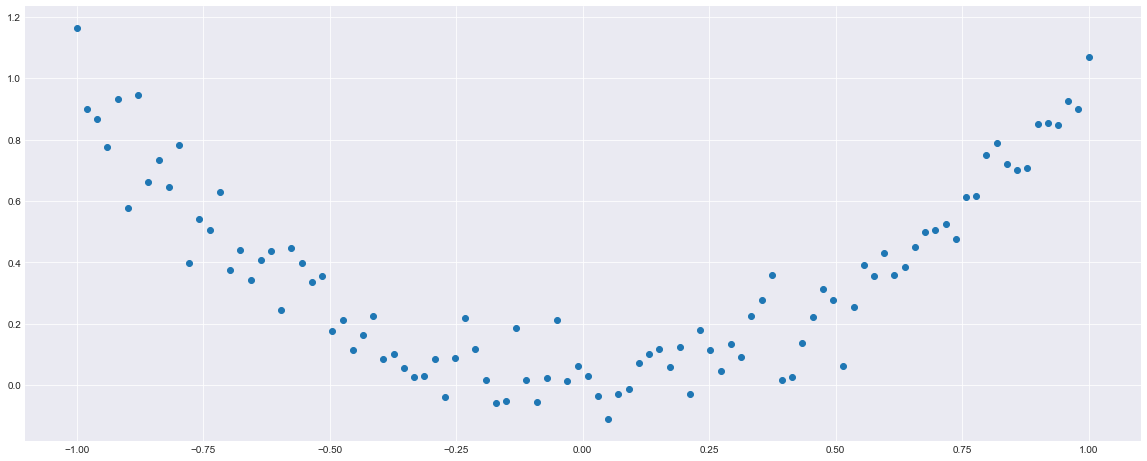

In [21]:
# 3.plot data
plt.figure(figsize = (20, 8))
plt.scatter(x, y)
plt.show()

In [22]:
# 4.Define data in place holder
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

In [23]:
# 5.Define Model
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden leyer
output = tf.layers.dense(l1, 1) # output layer

loss = tf.losses.mean_squared_error(tf_y, output) # compute cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train_op = optimizer.minimize(loss)

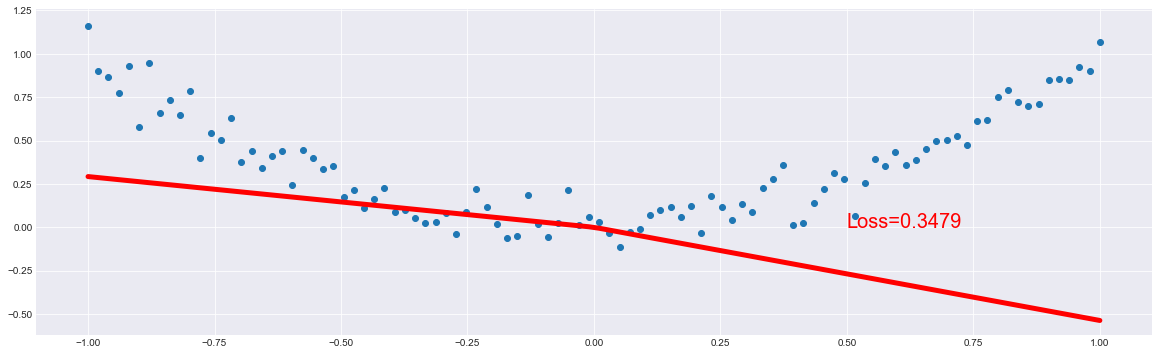

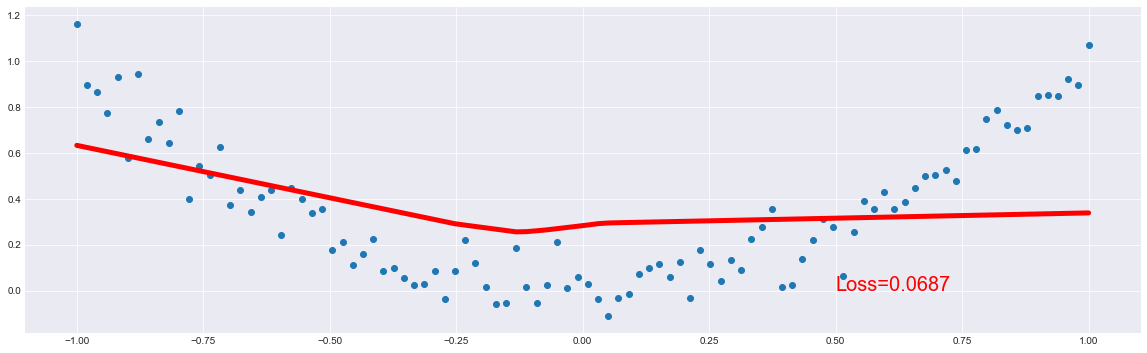

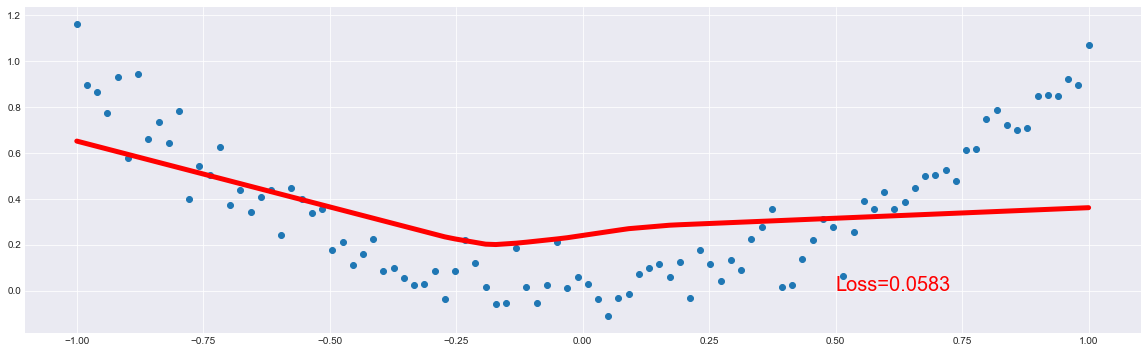

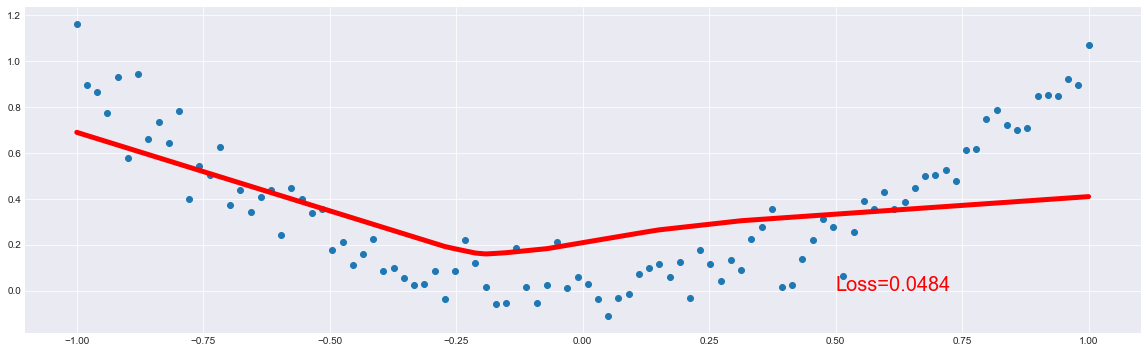

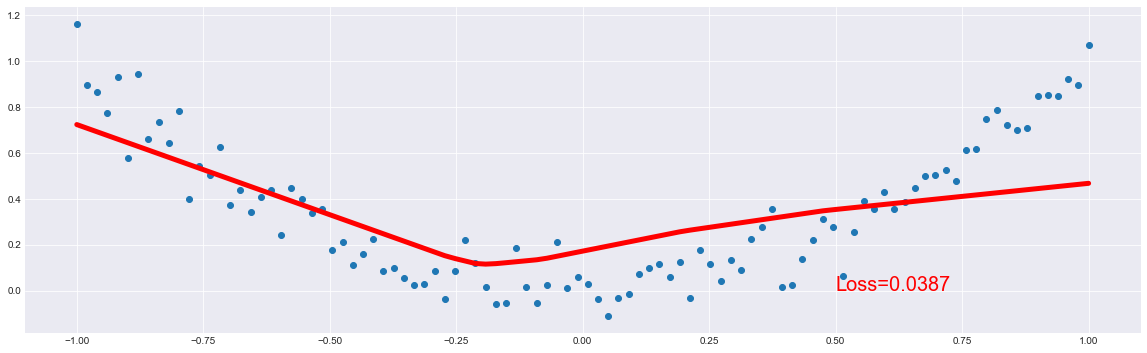

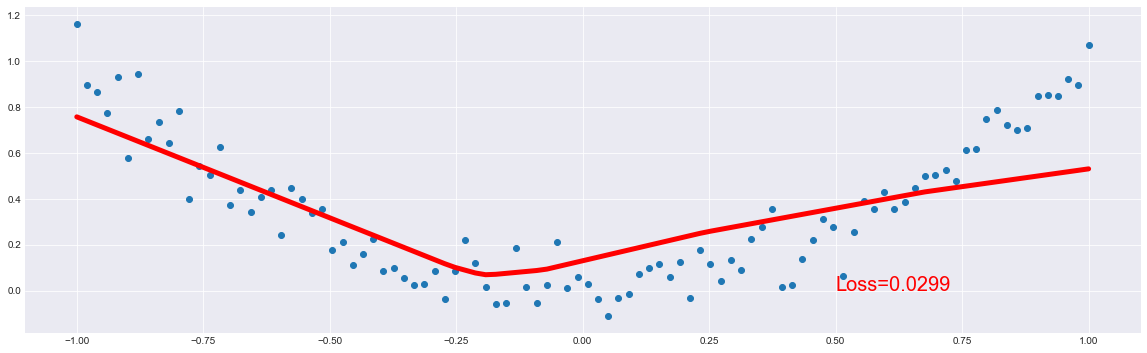

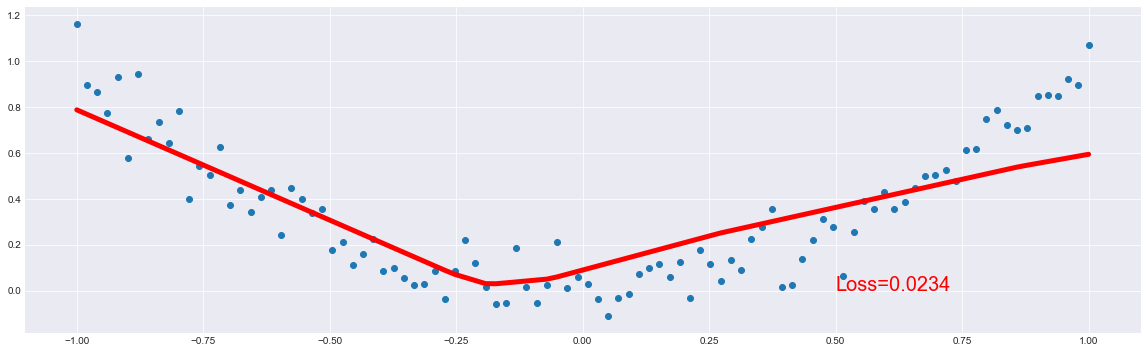

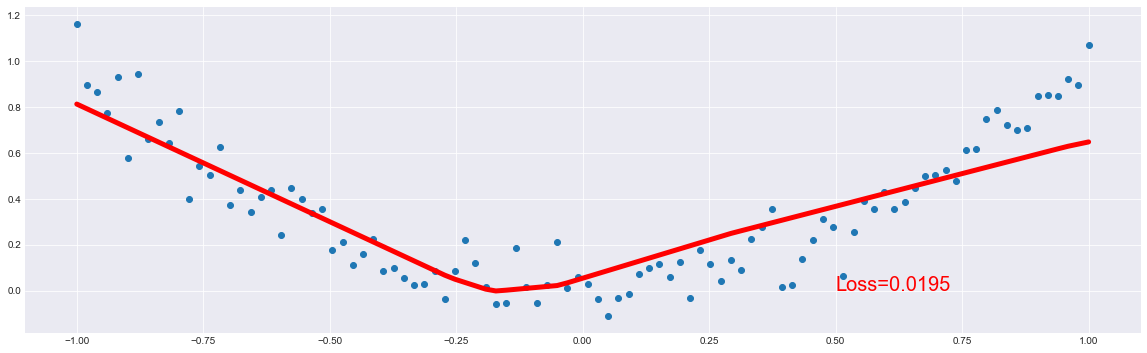

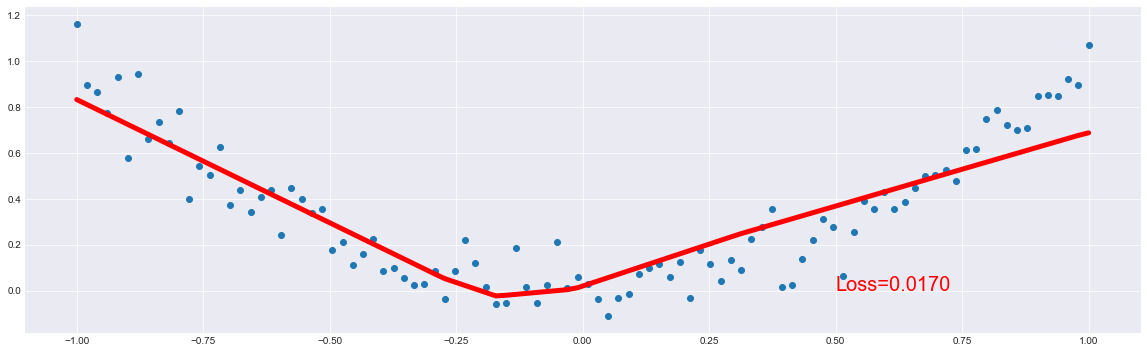

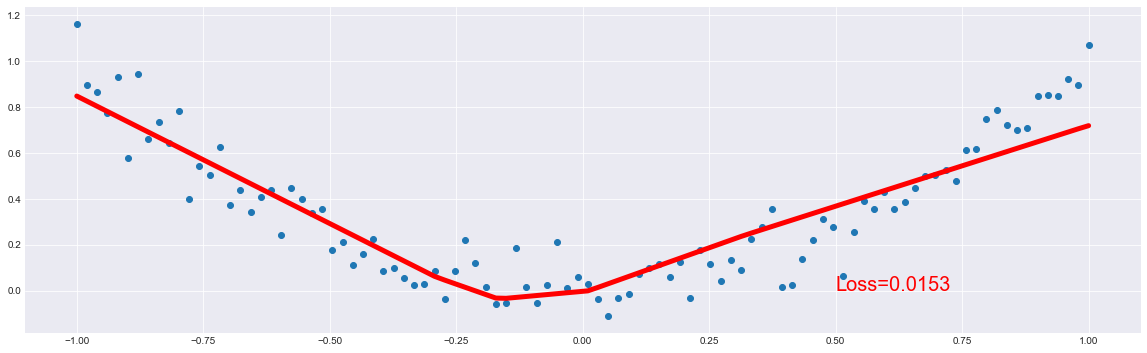

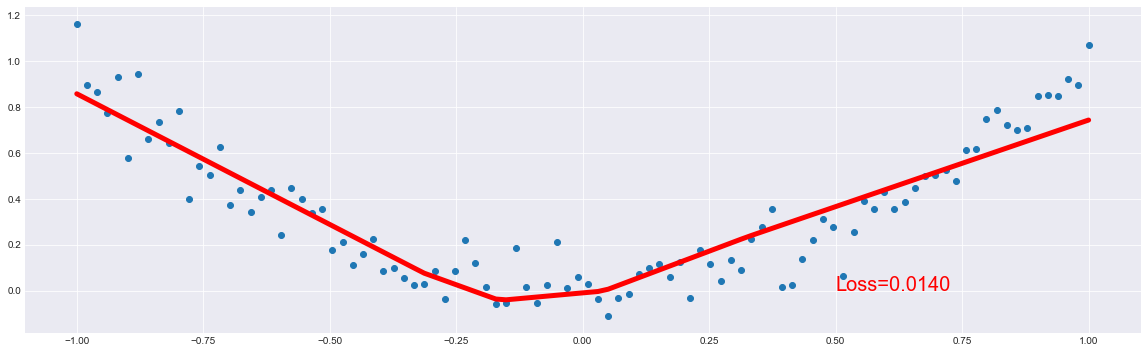

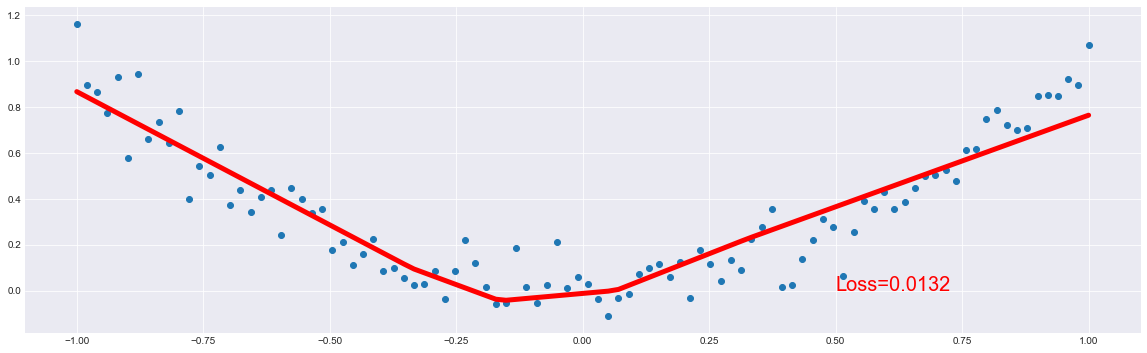

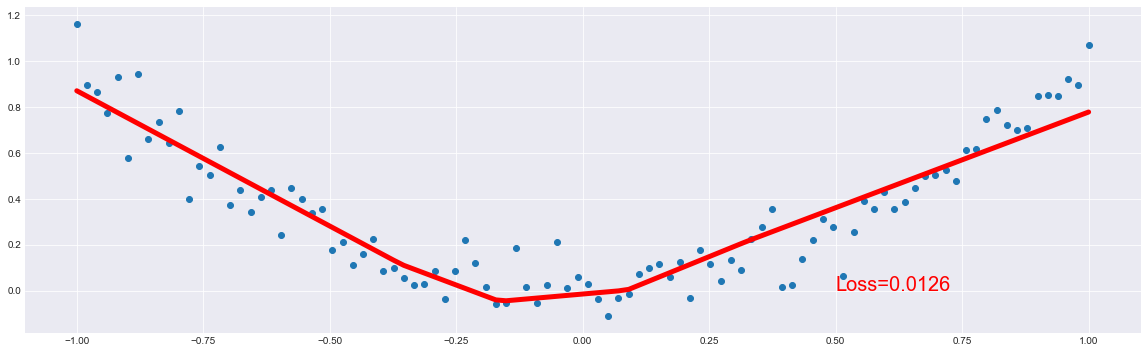

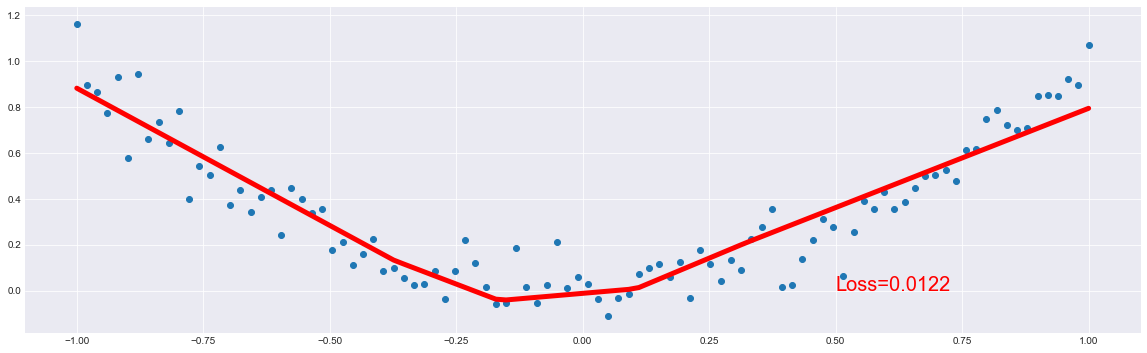

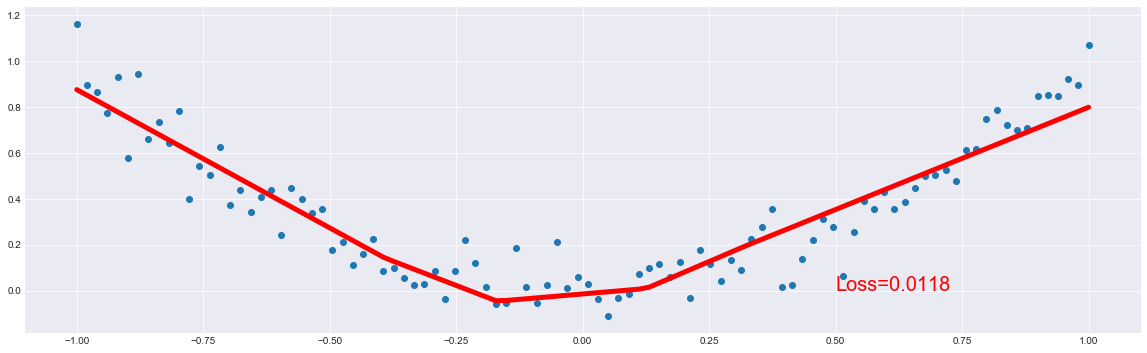

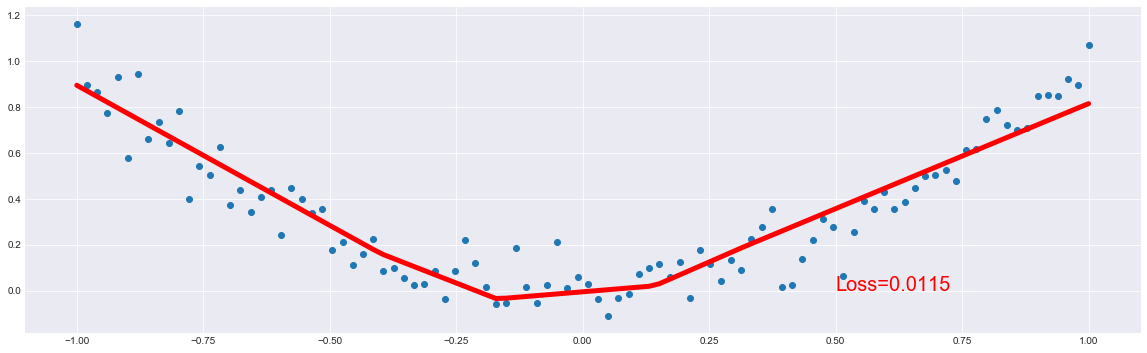

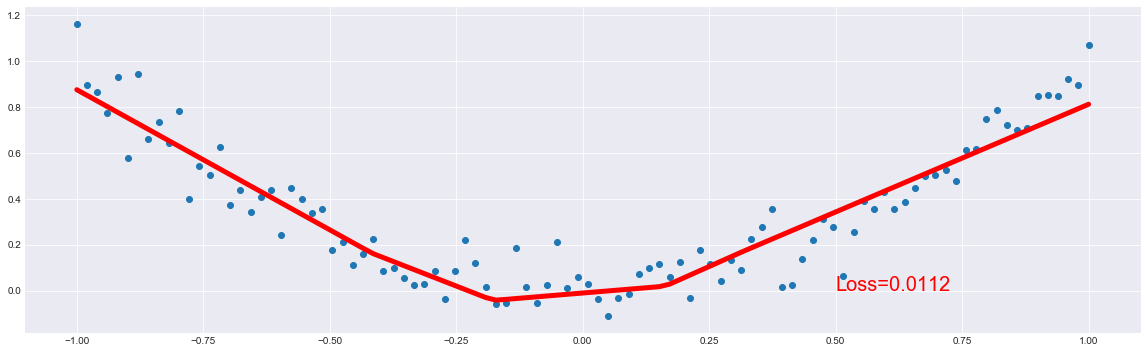

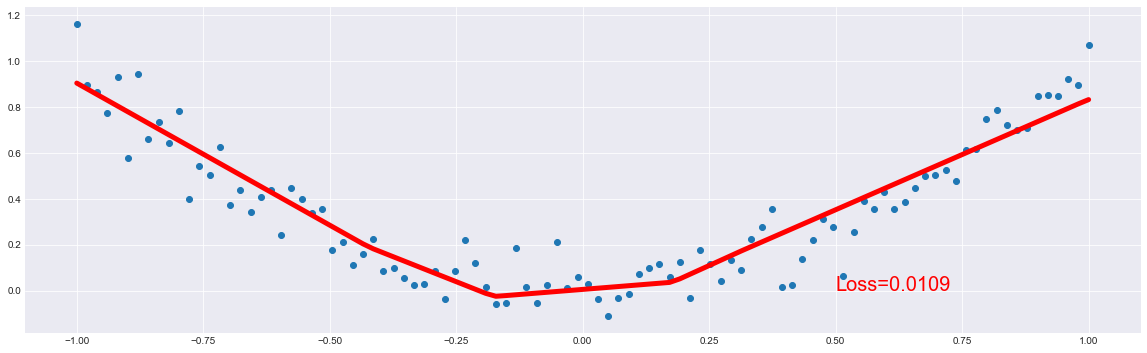

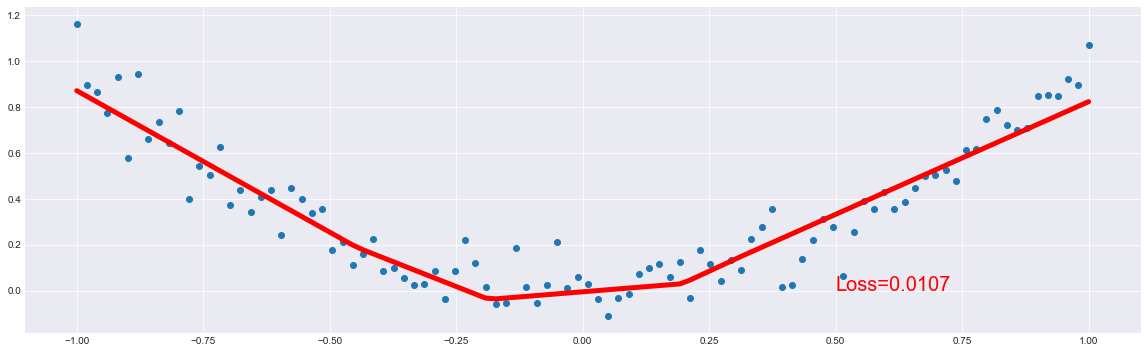

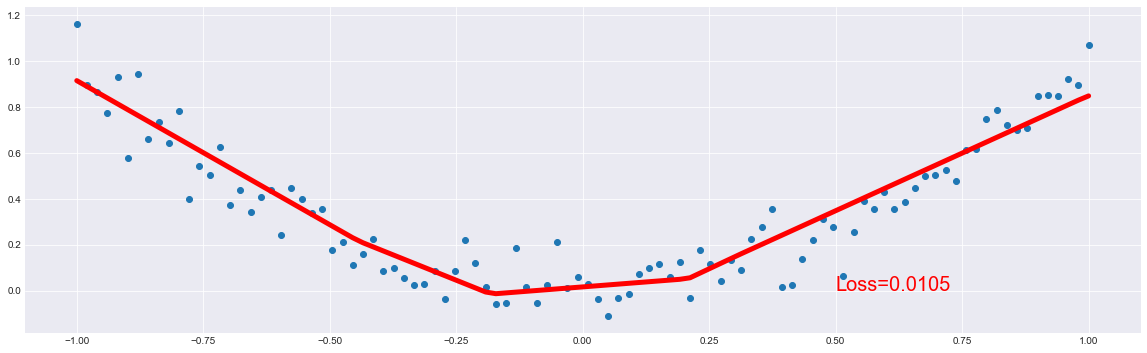

In [24]:
# 6.Session Start for Model training
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # something about plotting

for step in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 5 == 0:
        # plot and show learning process
        plt.figure(figsize=(20,6))
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# Other Related Notebook for learning
* Linear Regression (notebook) (code). Implement a Linear Regression with TensorFlow.
* Linear Regression (eager api) (notebook) (code). Implement a Linear Regression using TensorFlow's Eager API.
* Logistic Regression (notebook) (code). Implement a Logistic Regression with TensorFlow.
* Logistic Regression (eager api) (notebook) (code). Implement a Logistic Regression using TensorFlow's Eager API.
* Nearest Neighbor (notebook) (code). Implement Nearest Neighbor algorithm with TensorFlow.
* K-Means (notebook) (code). Build a K-Means classifier with TensorFlow.
* Random Forest (notebook) (code). Build a Random Forest classifier with TensorFlow.
* Gradient Boosted Decision Tree (GBDT) (notebook) (code). Build a Gradient Boosted Decision Tree (GBDT) with TensorFlow.
* Word2Vec (Word Embedding) (notebook) (code). Build a Word Embedding Model (Word2Vec) from Wikipedia data, with TensorFlow.

# 7.0 Classification

* Classification is a supervised learning algorithm that models or predicts discrete random variables. Classification is usually based on regression method extensions and is suitable for predicting a category (or probability of a category) rather than a continuous value.
Common classification methods include :

* 1) Logistic Regression: Corresponds to the linear regression method, but uses the Sigmoid function to map the prediction to a value between 0 and 1.
* 2) Classification tree: Corresponding regression tree, also known as classification regression tree (CART), divides the data set into different branches to achieve hierarchical classification.
* 3) Deep learning: using multi-layer neural network classification
* 4) Support Vector Machine (SVM): Calculate the distance between support vectors based on kernel functions and find the boundary that maximizes its spacing from the sample
* 5) Naive Bayes: A Classification Method Based on Bayes' Theorem and Characteristic Condition Independent Hypothesis

In [25]:
# Library
tf.reset_default_graph()  # To clear the default graph 
tf.set_random_seed(1)
np.random.seed(1)

In [26]:
# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, )
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100, )
x = np.vstack((x0, x1))  # shape (200, 2) + some noise
y = np.hstack((y0, y1))  # shape (200, )

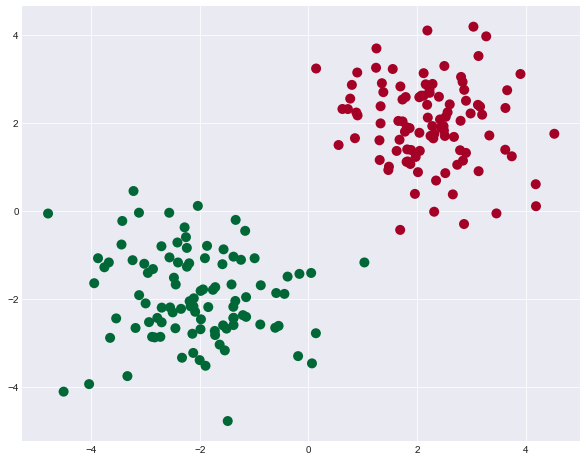

In [27]:
# Plot data
plt.figure(figsize=(10,8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')

In [28]:
# Load data into placeholder
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

In [29]:
# Model Training
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)   # hidden layer
output = tf.layers.dense(l1, 2)   # output layer

loss = tf.losses.sparse_softmax_cross_entropy(labels = tf_y, logits = output)   # compute cost
accuracy = tf.metrics.accuracy(labels=tf_y, predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

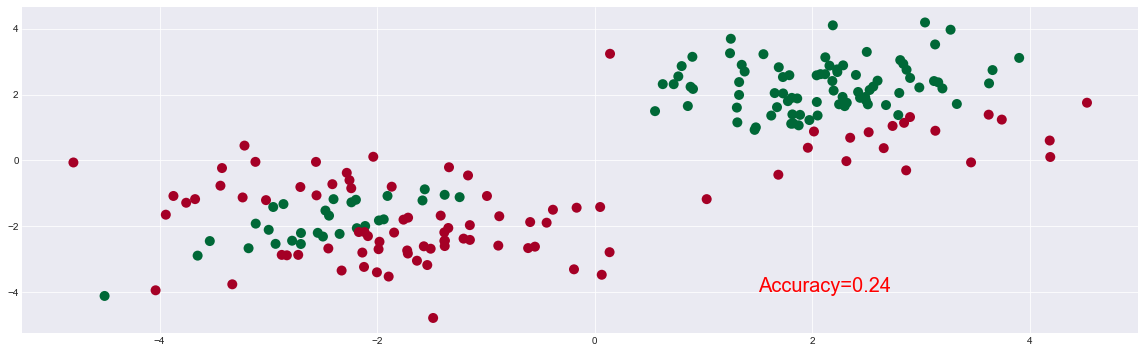

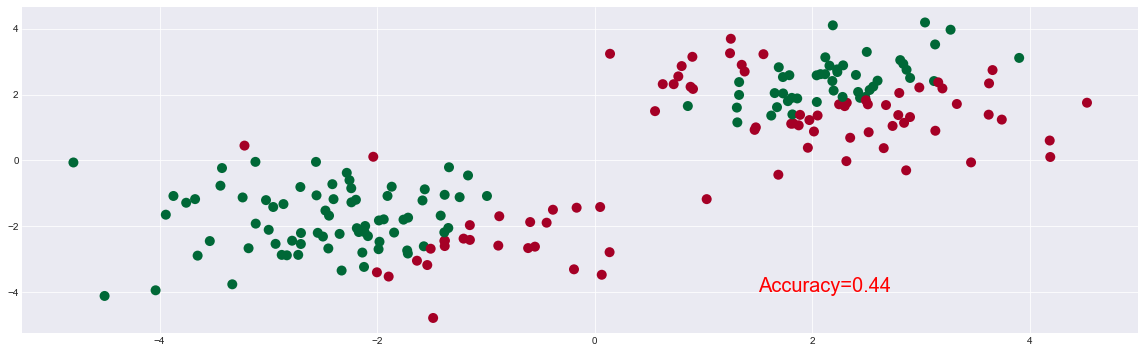

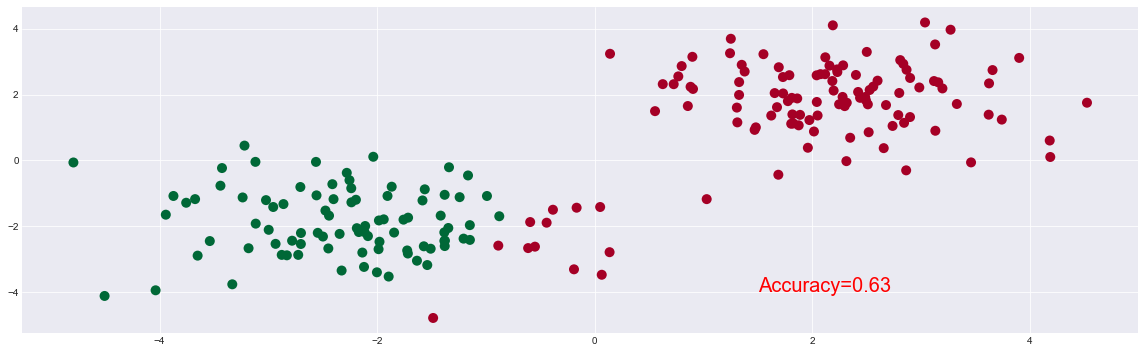

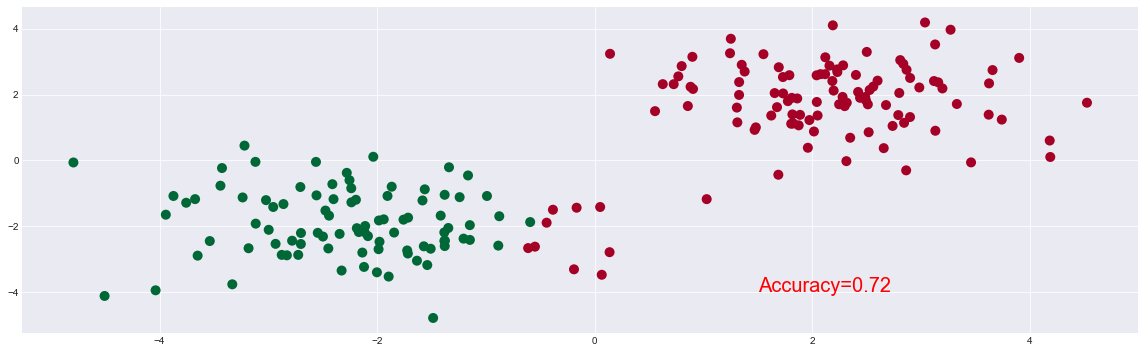

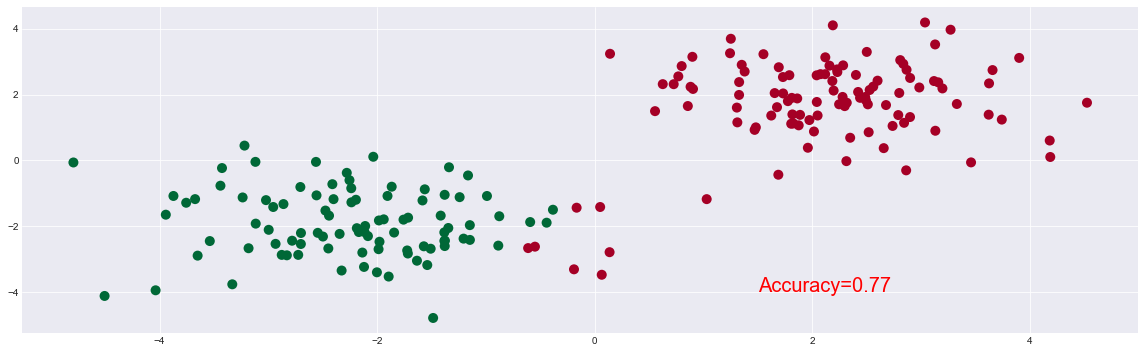

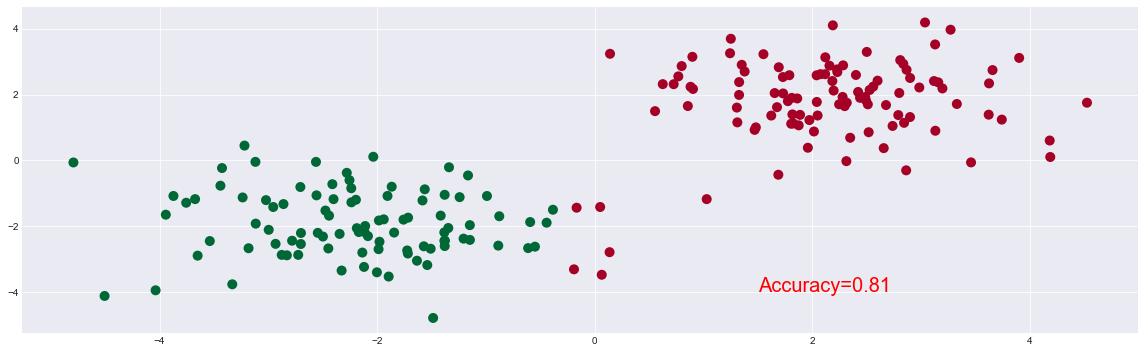

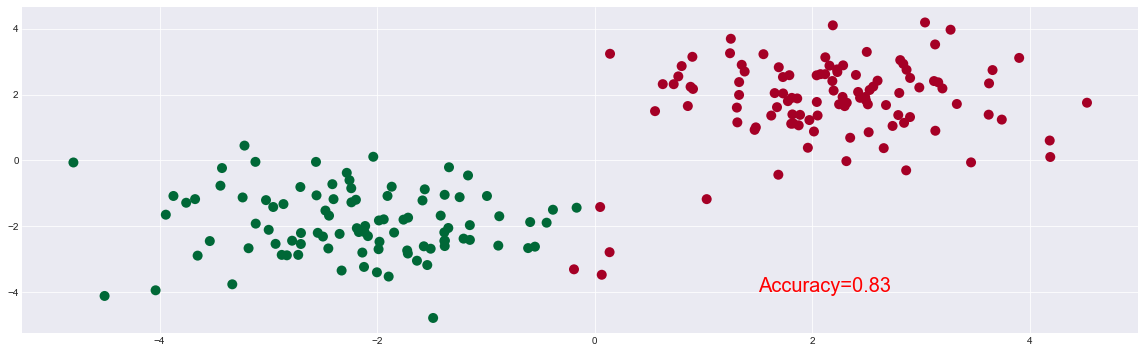

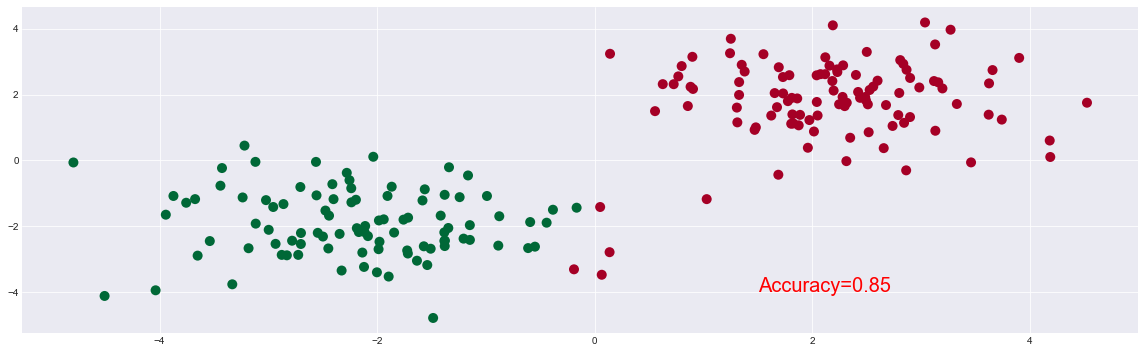

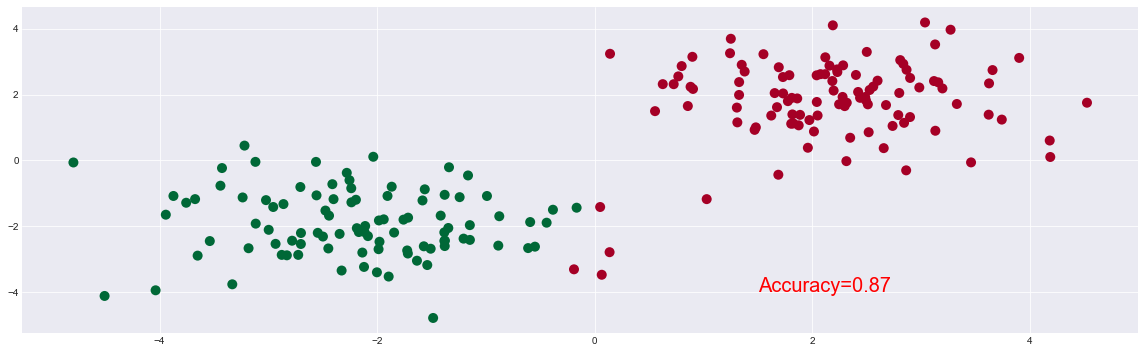

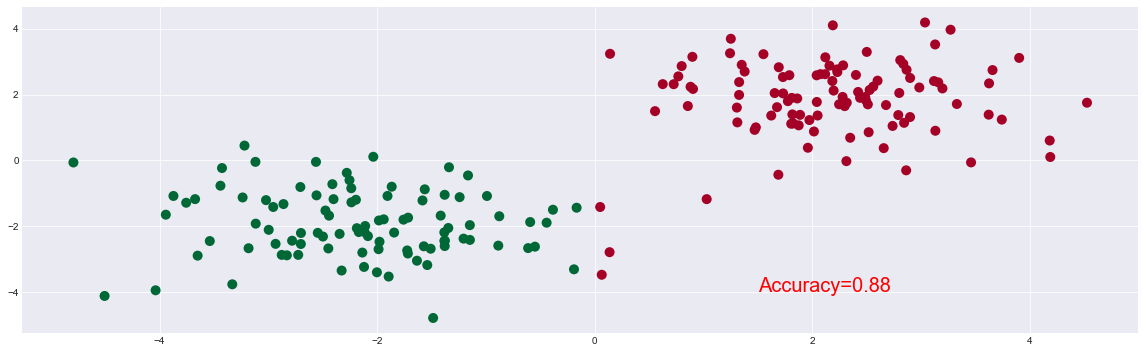

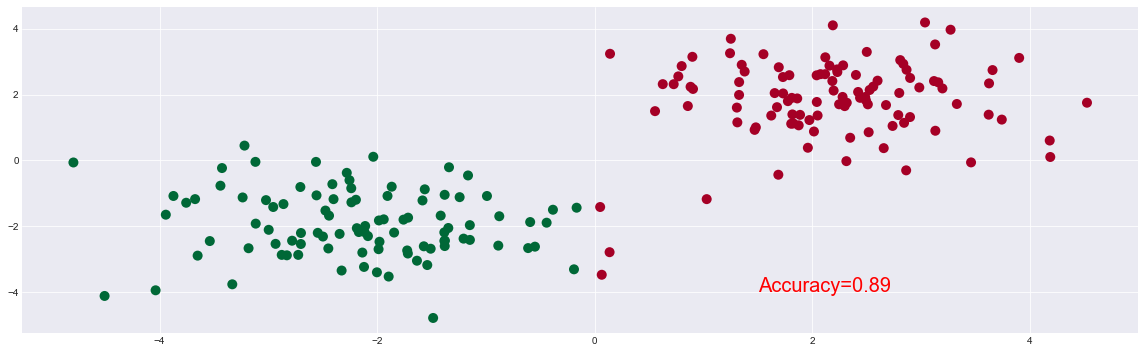

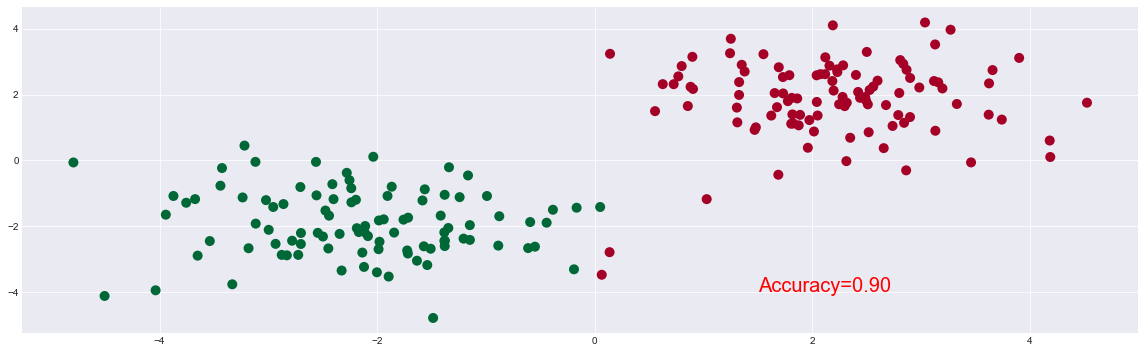

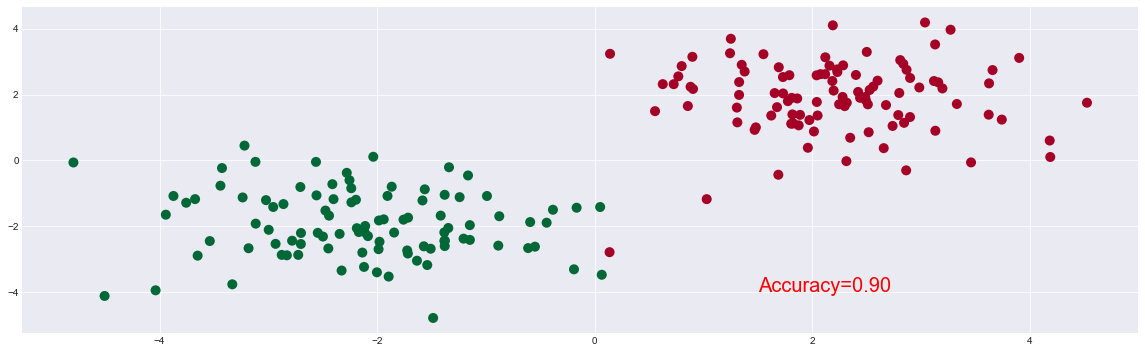

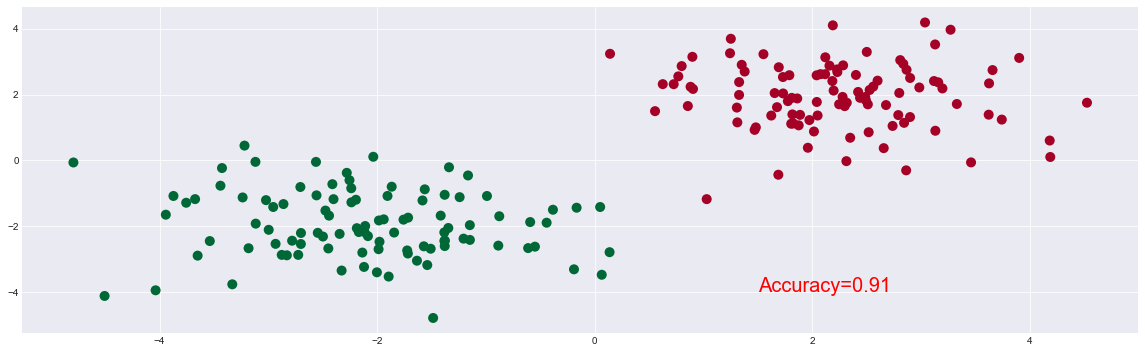

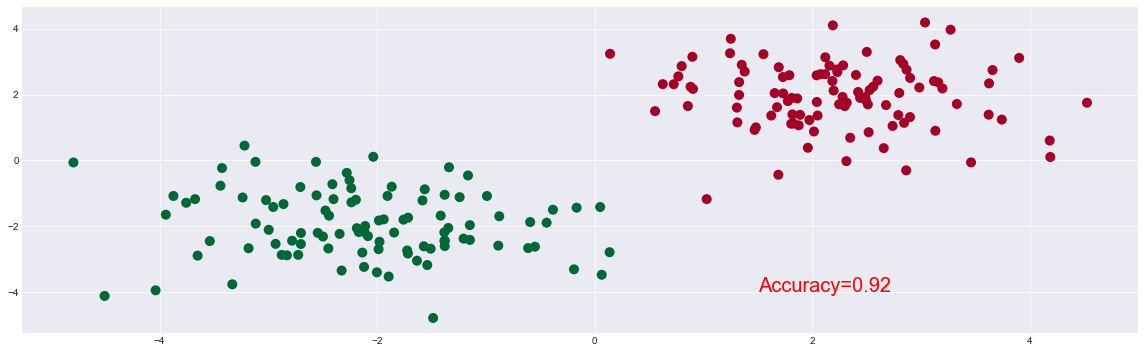

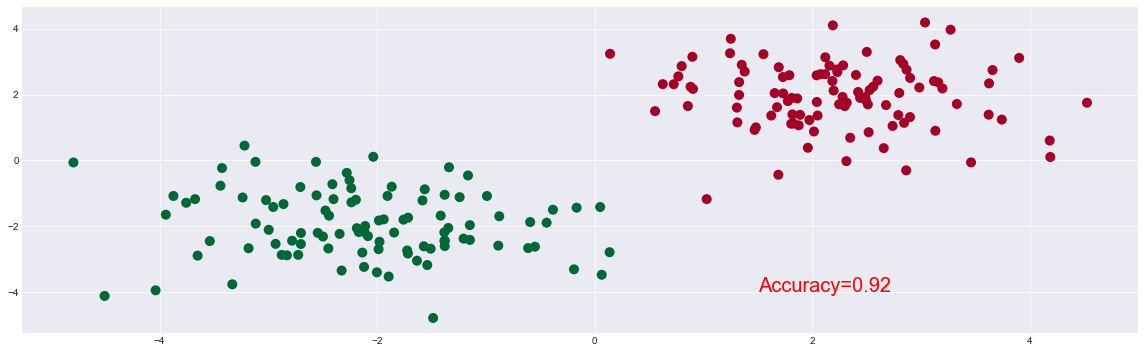

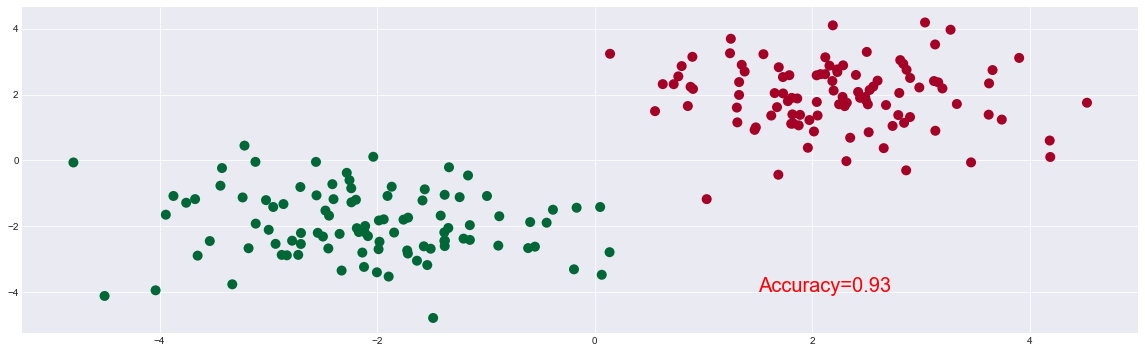

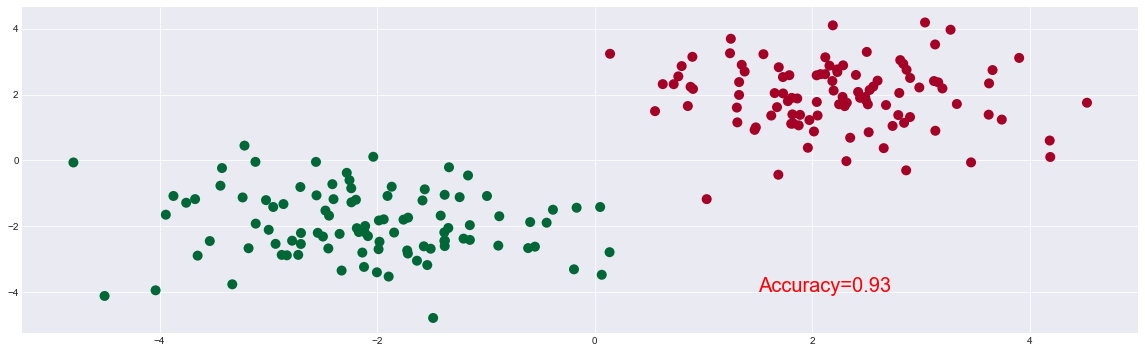

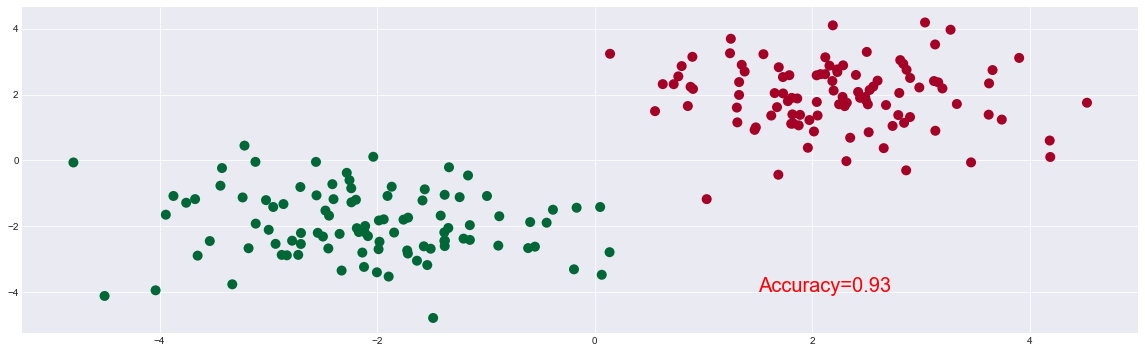

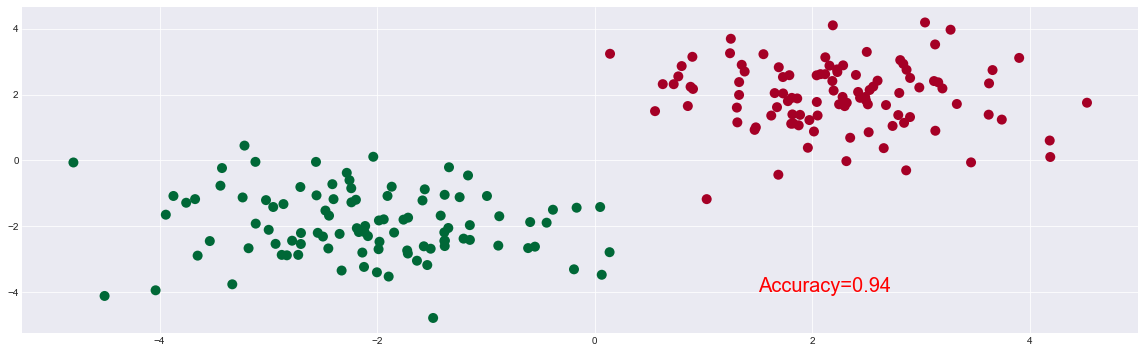

In [30]:
# Model Result
sess = tf.Session()   # control trianing and others
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)    # initiate var in graph

plt.ion()   # something about plotting
for step in range(40):
    # train and net output
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y:y})
    if step % 2 == 0:
        # plot and show learning process
        plt.figure(figsize = (20,6))
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# 8.0 Save and reload

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.reset_default_graph()  # To clear the default graph 
tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

In [32]:
def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)   # hidden layer
    o = tf.layers.dense(l, 1)                     # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  # initialize var in graph

    saver = tf.train.Saver()  # define a saver for saving and restoring

    for step in range(100):                             # train
        sess.run(train_op, {tf_x: x, tf_y: y})

    saver.save(sess, './params', write_meta_graph=False)  # meta_graph is not recommended

    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(20, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})

In [33]:
def reload():
    print('This is a reload')
    # build entire net again and restore
    tf_x = tf.placeholder(tf.float32, x.shape)    # input x
    tf_y = tf.placeholder(tf.float32, y.shape)    # input y
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)    # hidden leyer
    o_ = tf.layers.dense(l_, 1)    # output layer
    loss_= tf.losses.mean_squared_error(tf_y, o_)     # compute cost
    
    sess = tf.Session()
    # don't need to initialize variables, just restoring trained variables
    
    saver = tf.train.Saver()   # define a saver for saving and restoring
    
    saver.restore(sess, './params')
    
    # plotting
    pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw = 5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()

This is save
This is a reload
INFO:tensorflow:Restoring parameters from ./params


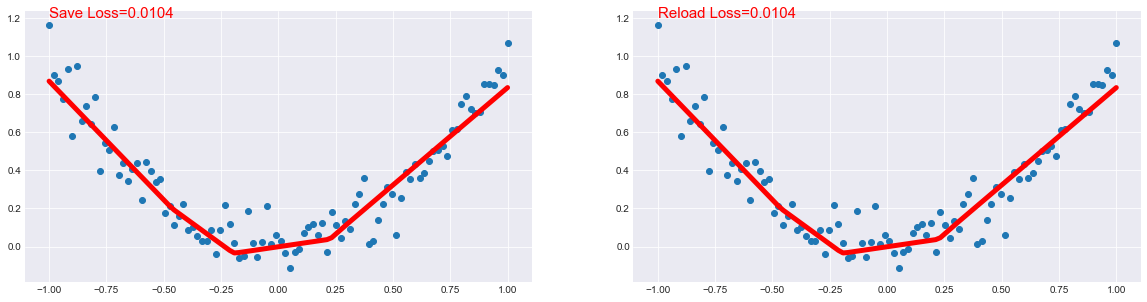

In [34]:
save()

# destroy previous net
tf.reset_default_graph()

reload()

# 9.0 Optimizers

In [35]:
# Load Library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.reset_default_graph()    # To clear the default graph
tf.set_random_seed(1)
np.random.seed(1)

In [36]:
# Define parameters and Generate Data
lr = 0.01
batch_size = 32

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size = x.shape)
y = np.power(x, 2) + noise

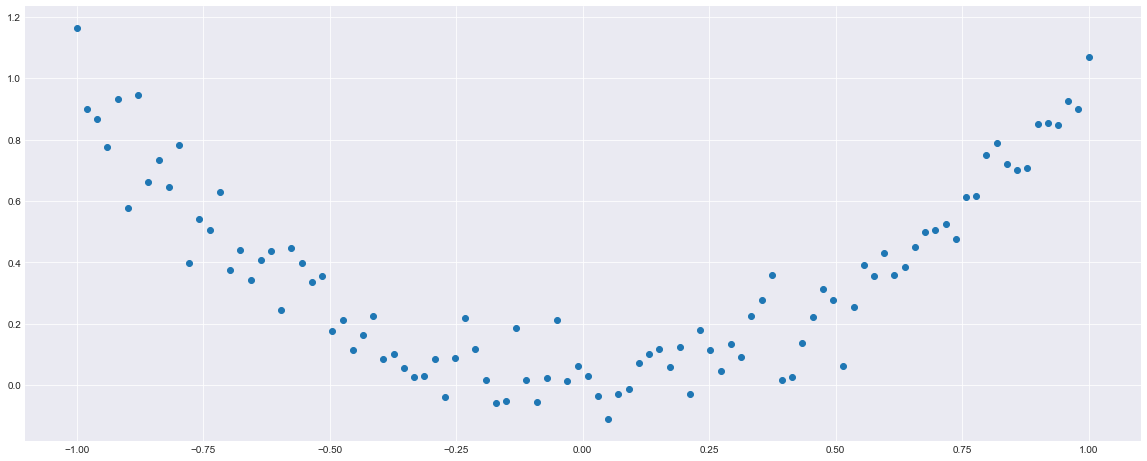

In [37]:
# plot dataset
plt.figure(figsize = (20,8))
plt.scatter(x, y)
plt.show()

In [38]:
# default network
class net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(lr, **kwargs).minimize(self.loss)

In [39]:
# Different Optimiser, different nets
net_sgd = net(tf.train.GradientDescentOptimizer)
net_momentum = net(tf.train.MomentumOptimizer, momentum = 0.9)
net_rmsprop = net(tf.train.RMSPropOptimizer)
net_adam = net(tf.train.AdamOptimizer)
nets = [net_sgd, net_momentum, net_rmsprop, net_adam]

C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "besst". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


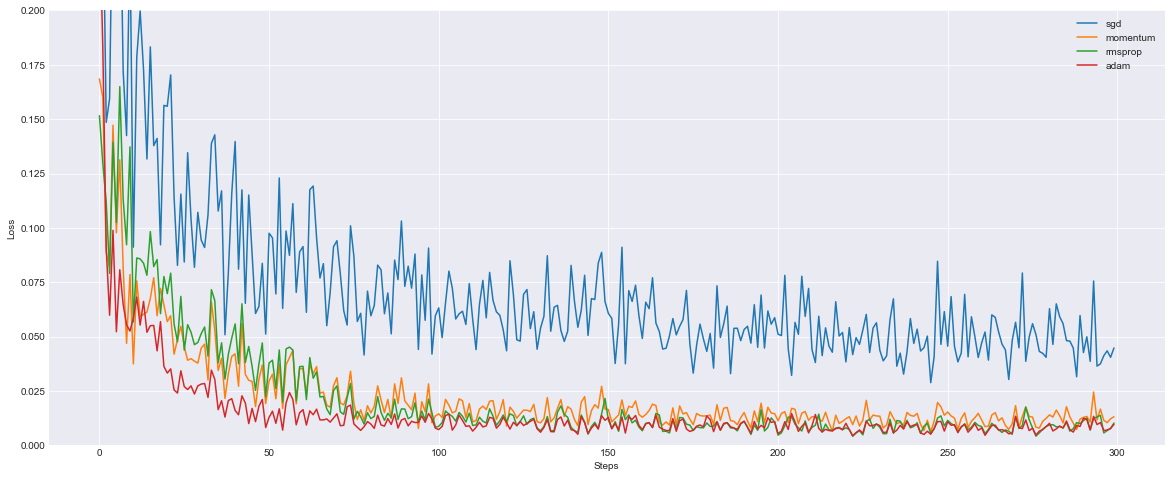

In [40]:
# Model Training and Prediction
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[], [], [], []]    # record loss

# training
for step in range(300):    # for each training step
    index = np.random.randint(0, x.shape[0], batch_size)
    b_x = x[index]
    b_y = y[index]
    
    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)   # loss recorder
        
#plot loss history
labels = ['sgd', 'momentum', 'rmsprop', 'adam']
plt.figure(figsize = (20,8))
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
plt.legend(loc='besst')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

# 10.0 Tensorboard

In [41]:
# load dataset
tf.reset_default_graph()    # To clear the default graph
tf.set_random_seed(1)
np.random.seed(1)

In [42]:
# generate fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size = x.shape)
y = np.power(x, 2) + noise

In [43]:
# model training with placeholders of data
with tf.variable_scope('Inputs'):
    tf_x = tf.placeholder(tf.float32, x.shape, name = 'x')
    tf_y = tf.placeholder(tf.float32, y.shape, name = 'y')
    
with tf.variable_scope('Net'):
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu, name = 'hidden_layer')
    output = tf.layers.dense(l1, 1, name = 'output_layer')
    
    # add to histogram summary
    tf.summary.histogram('h_out', l1)
    tf.summary.histogram('pred', output)
    
loss = tf.losses.mean_squared_error(tf_y, output, scope = 'loss')
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
tf.summary.scalar('loss', loss)    # add loss to scalar summary

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [44]:
# generate tensorboard and see the the results
sess = tf.Session()
sess.run(tf.global_variables_initializer())

writer = tf.summary.FileWriter('./log', sess.graph)    # write to file
merge_op = tf.summary.merge_all()    # operation to merge all summary

for step in range(100):
    # train and net output
    _, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})
    writer.add_summary(result, step)

# 11.0 Advanced nerual network (Deep Learning)

In [45]:
# load library
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()   # To clear the default graph

tf.set_random_seed(1)
np.random.seed(1)

In [46]:
# Read dataset and set parameters
batch_size = 50
lr = 0.001    # learning rate

mnist = input_data.read_data_sets('input', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting input\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting input\t10k-images-idx3-ubyte.gz
Extracting input\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [47]:
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

(55000, 784)
(55000, 10)


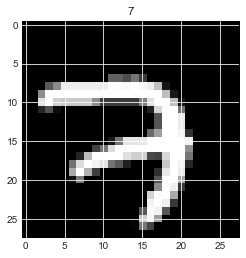

In [48]:
# Plot one example
print(mnist.train.images.shape)    # (55000, 28 * 28)
print(mnist.train.labels.shape)    # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28,28)), cmap='gray')
plt.title(np.argmax(mnist.train.labels[0]))
plt.show()

In [49]:
# Define a placeholder to store data
tf_x = tf.placeholder(tf.float32, [None, 28 * 28]) / 255    # input x
image = tf.reshape(tf_x, [-1, 28, 28, 1])    # batch, height, width, channel
tf_y = tf.placeholder(tf.int32, [None, 10])    # input y

# 11.1 CNN Model Design (Layers)
Layers
* Conv2d - Functional interface for the 2D convolution layer. This layer creates a convolution kernel that is convolved (actually cross-correlated) with the layer input to produce a tensor of outputs. If use_bias is True (and a bias_initializer is provided),a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

* Max_pooling2d - Max pooling layer for 2D inputs (e.g. images).
* Dense - Functional interface for the densely-connected layer.
* Argumax - Returns the index with the largest value across axes of a tensor.

In [50]:
# cnn
conv1 = tf.layers.conv2d(       # shape (28,28,1)
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu)     # (28,28,16)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2)    # (14,14,16)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # (14,14,32)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # (7,7,32)
flat = tf.reshape(pool2, [-1, 7*7*32])    # (7*7*32, )
output = tf.layers.dense(flat, 10)

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits = output)
train_op = tf.train.AdamOptimizer(lr).minimize(loss)

accuracy = tf.metrics.accuracy(labels = tf.argmax(tf_y, axis=1), predictions = tf.argmax(output, axis=1))[1]

Step: 0 | train loss: 2.2956 | test accuracy: 0.14


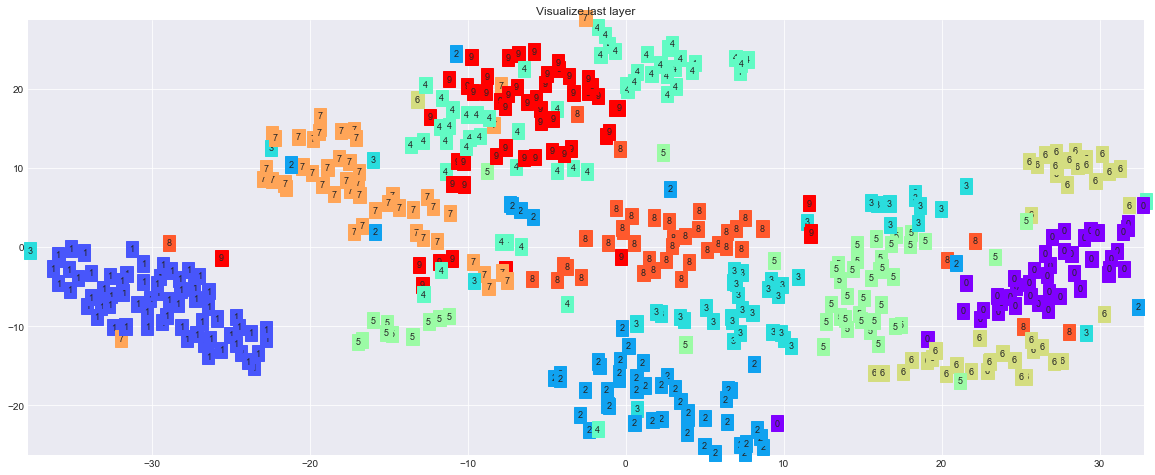

Step: 50 | train loss: 0.3619 | test accuracy: 0.48


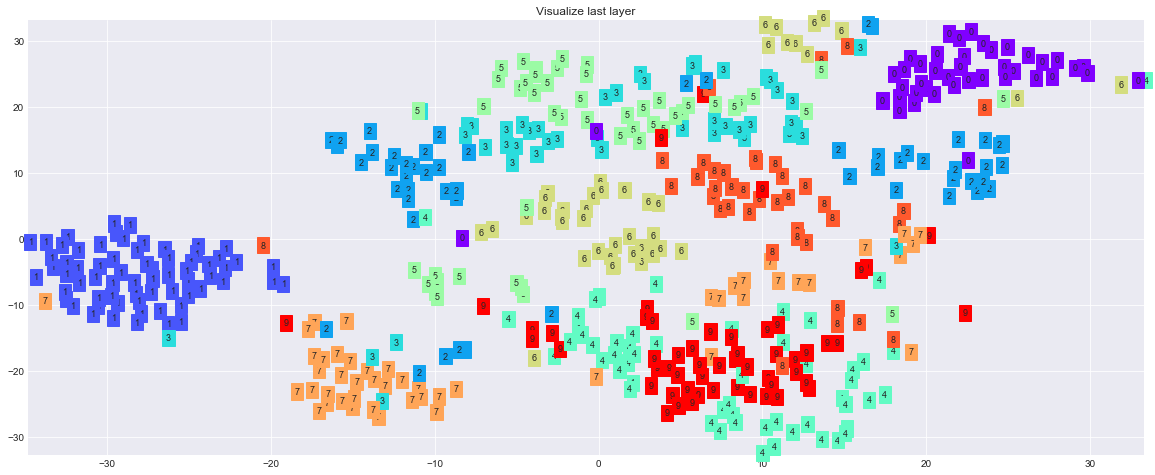

Step: 100 | train loss: 0.2206 | test accuracy: 0.61


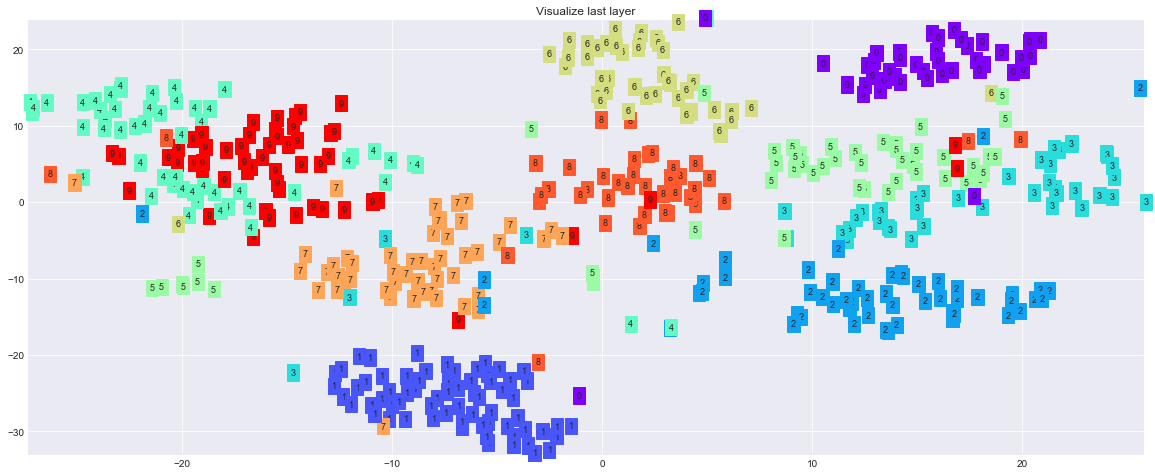

Step: 150 | train loss: 0.2453 | test accuracy: 0.69


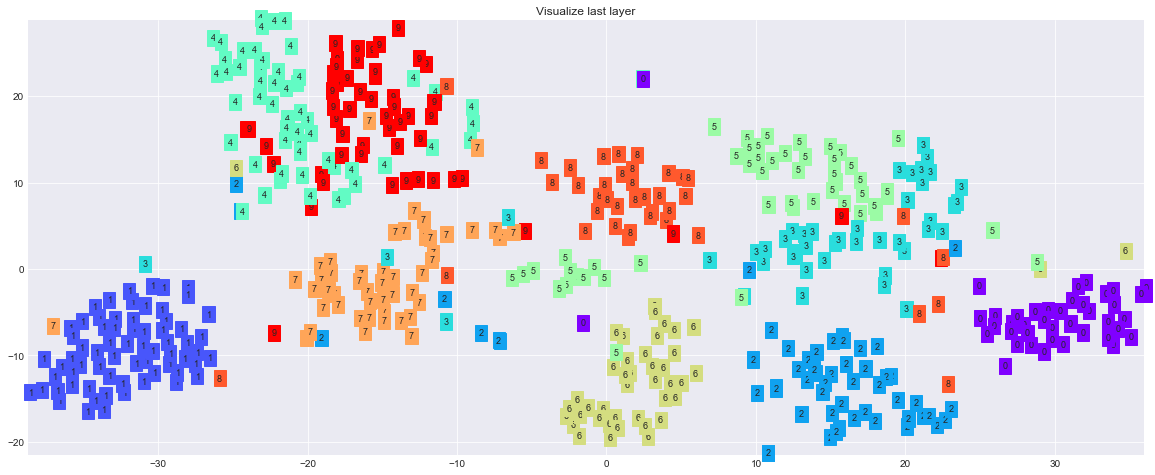

Step: 200 | train loss: 0.1977 | test accuracy: 0.74


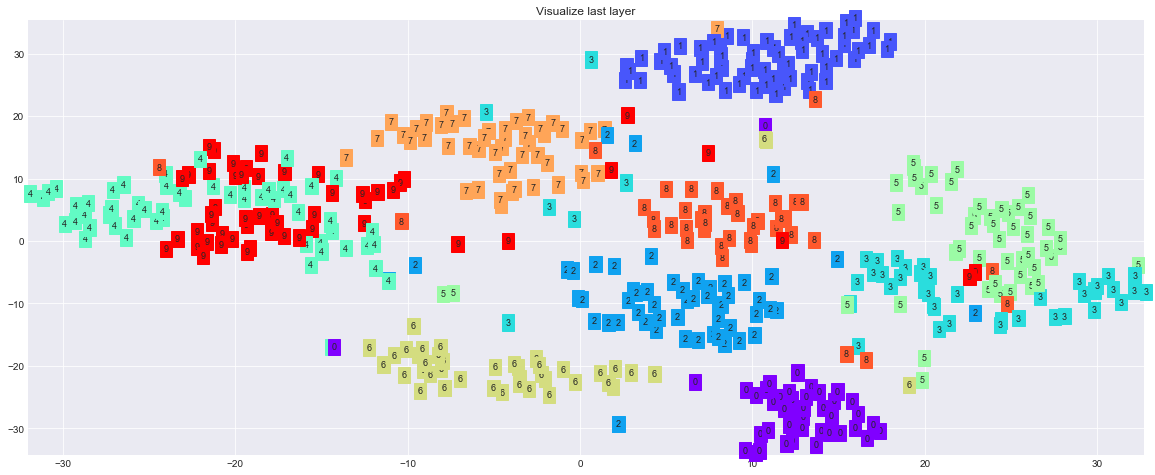

Step: 250 | train loss: 0.2194 | test accuracy: 0.77


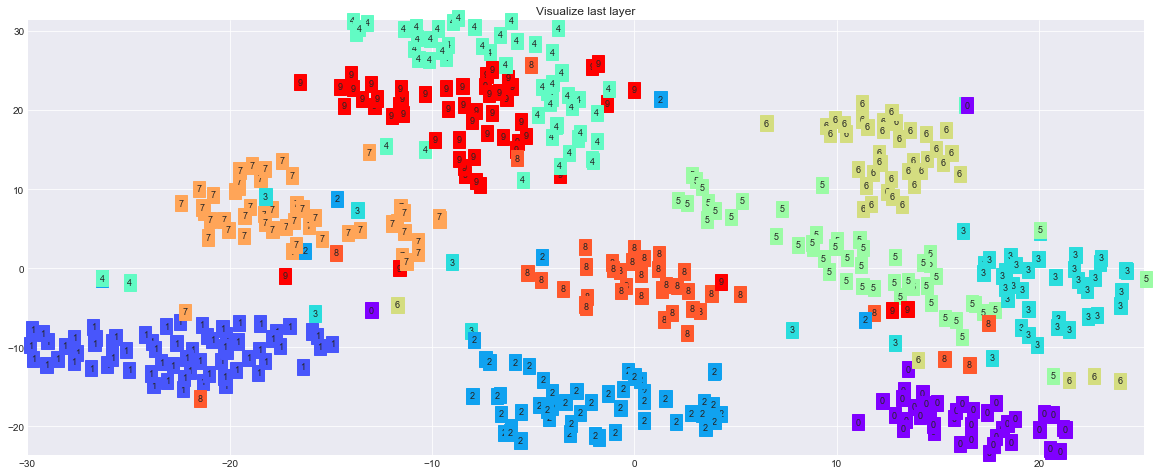

Step: 300 | train loss: 0.0823 | test accuracy: 0.79


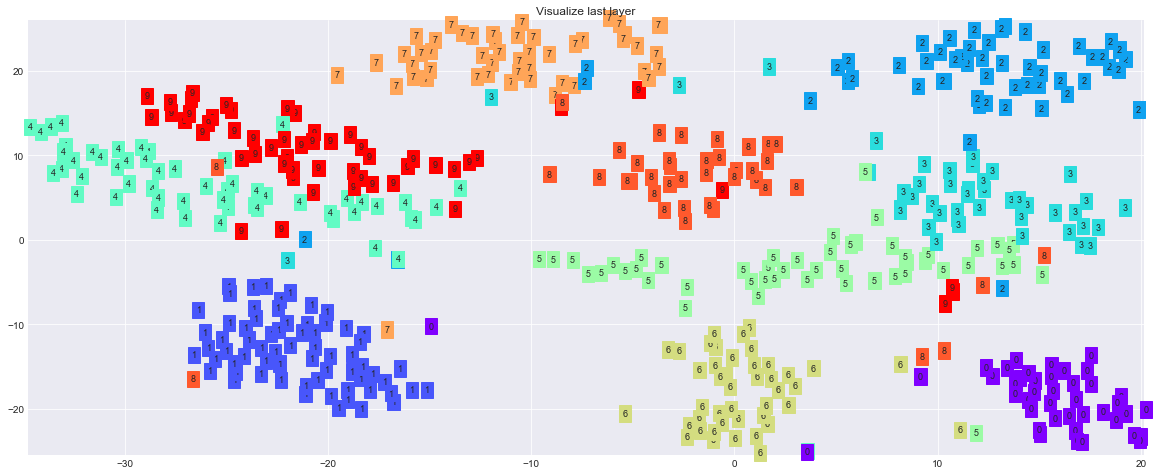

Step: 350 | train loss: 0.0709 | test accuracy: 0.81


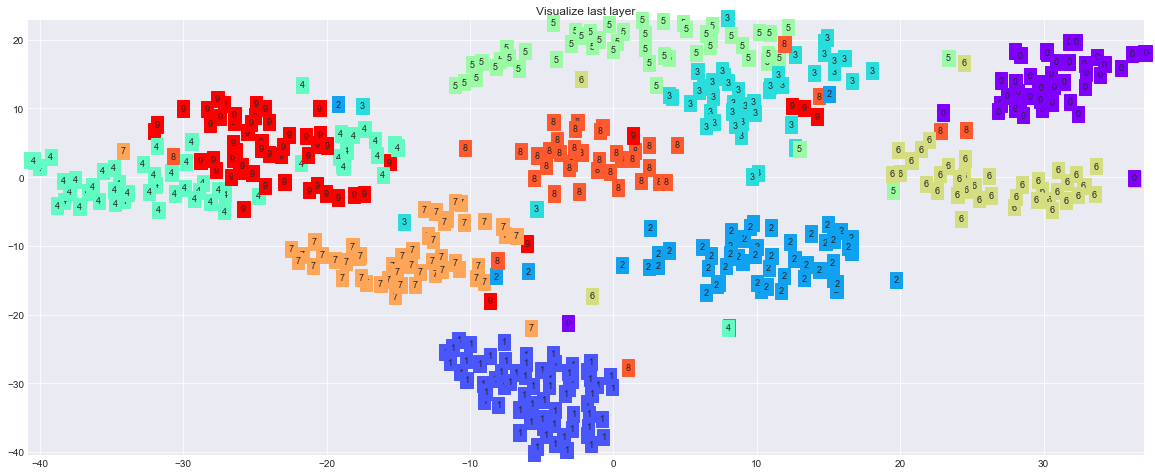

Step: 400 | train loss: 0.1075 | test accuracy: 0.83


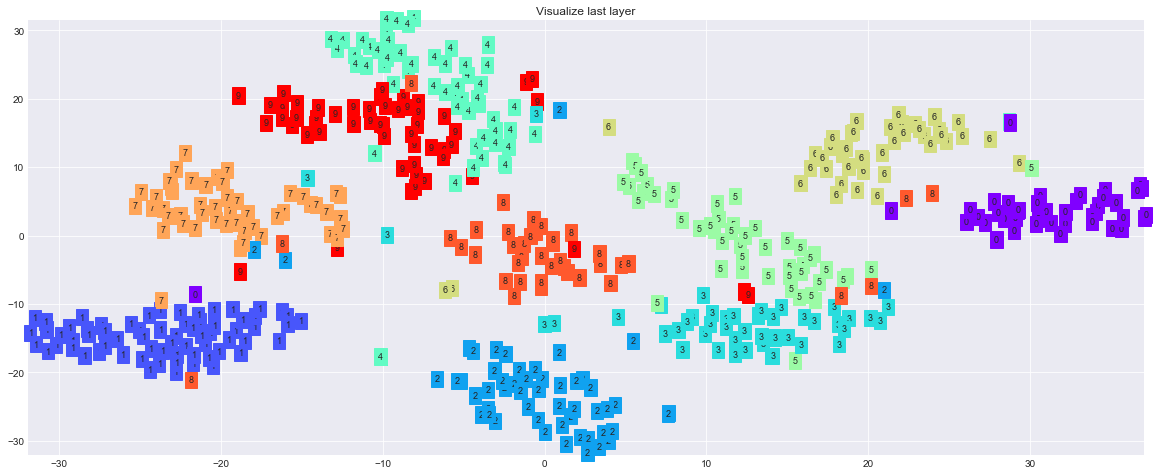

Step: 450 | train loss: 0.0774 | test accuracy: 0.84


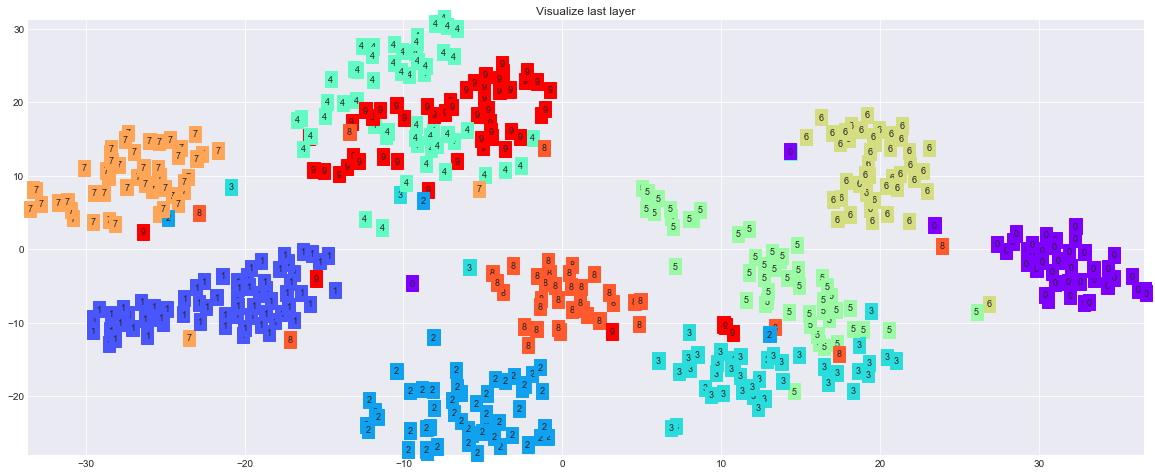

Step: 500 | train loss: 0.1931 | test accuracy: 0.85


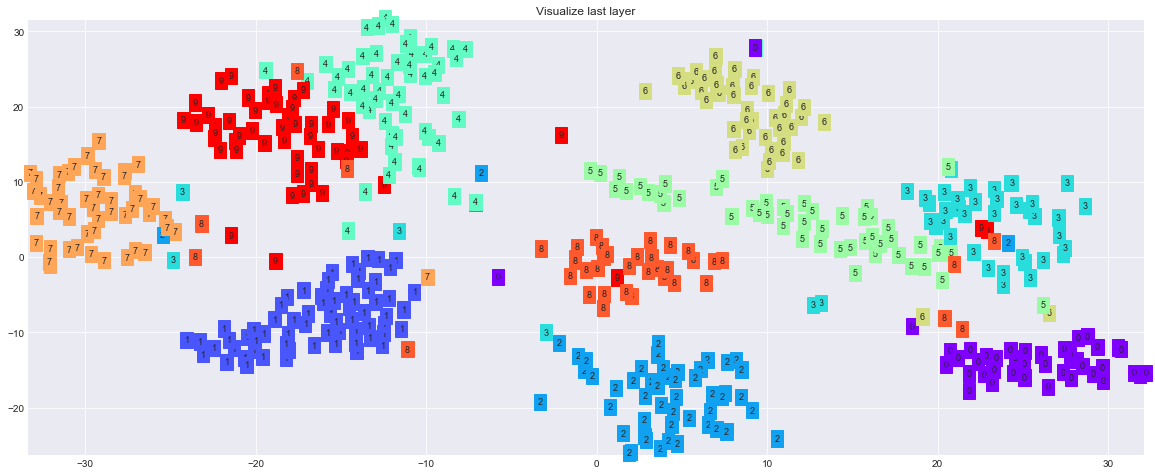

Step: 550 | train loss: 0.1194 | test accuracy: 0.86


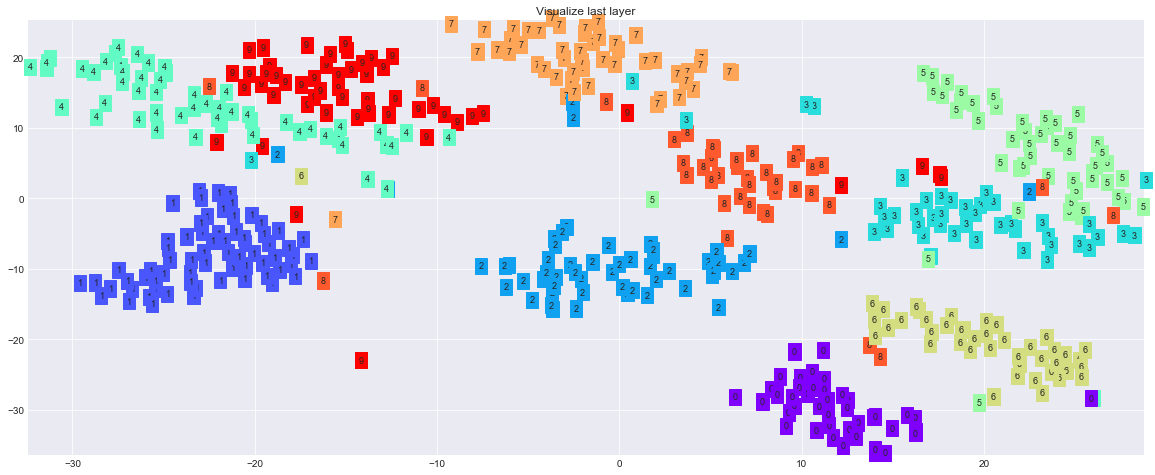

In [51]:
# model run
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())    # the local var is for accuracy_op
sess.run(init_op)

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('\nPlease install sklearn for layer visualization\n')
def plot_with_labels(lowDWeights, labels):
    plt.figure(figsize=(20,8))
    plt.cla(); X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()

for step in range(600):
    b_x, b_y = mnist.train.next_batch(batch_size)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_, flat_representation = sess.run([accuracy, flat], {tf_x: test_x, tf_y: test_y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

        if HAS_SK:
            # Visualization of trained flatten layer (T-SNE)
            tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000); plot_only = 500
            low_dim_embs = tsne.fit_transform(flat_representation[:plot_only, :])
            labels = np.argmax(test_y, axis=1)[:plot_only]; plot_with_labels(low_dim_embs, labels)
plt.ioff()

In [52]:
# Top 10 Predictions Results, print 10 predictions
test_output = sess.run(output, {tf_x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


# 11. 2 RNN Classification

* This time we will use RNN for regression training (Regression). We will continue to predict a cost curve using the sin curve we created. Next we will determine the various parameters of the RNN (super-parameters):)

In [53]:
# load Packages
time_step = 10    # rnn time step
input_size = 1    # rnn input size
cell_size = 32    # rnn cell size
lr = 0.02         # learning rate

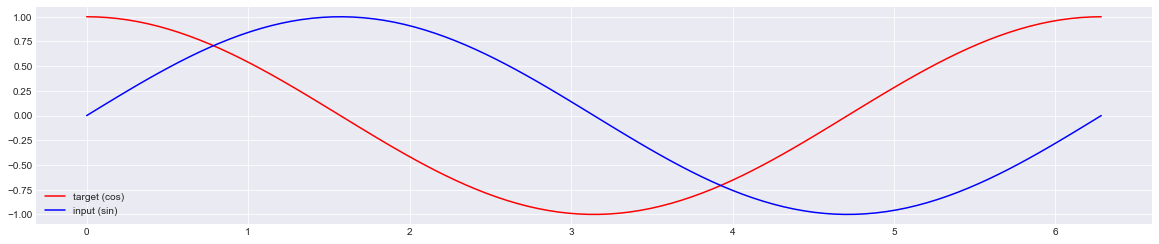

In [55]:
steps = np.linspace(0, np.pi*2, 100, dtype = np.float32)
x_np = np.sin(steps) ; y_np = np.cos(steps)    # float32 for converting torch FloatTensor
plt.figure(figsize = (20,4))
plt.plot(steps, y_np, '-r', label = 'target (cos)')
plt.plot(steps, x_np, 'b-', label = 'input (sin)')
plt.legend(loc='best')
plt.show()

In [58]:
# define placeholder
tf_x = tf.placeholder(tf.float32, [None, time_step, input_size])    # shape (batch, 10, 1)
tf_y = tf.placeholder(tf.float32, [None, time_step, input_size])     # input y

4. LSTMRNN Model Design
Use this to define a class of LSTMRNN will be more convenient first step in the definition of class. __init__Incoming various parameters:

Layers Used in Models :

* BasicRNNCell : The most basic RNN cell. Note that this cell is not optimized for performance. Please use tf.contrib.cudnn_rnn.CudnnRNNTanh for better performance on GPU.
* Zero_state : Return zero-filled state tensor(s).
* DynamicRNN : Creates a recurrent neural network specified by RNNCell cell. Performs fully dynamic unrolling of inputs.

In [67]:
# RNN
rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=cell_size)
init_s = rnn_cell.zero_state(batch_size=1, dtype=tf.float32)    # very first hidden state
outputs, final_s = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    tf_x,                       # input
    initial_state=init_s,       # the initial hidden state
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)
outs2D = tf.reshape(outputs, [-1, CELL_SIZE])                       # reshape 3D output to 2D for fully connected layer
net_outs2D = tf.layers.dense(outs2D, INPUT_SIZE)
outs = tf.reshape(net_outs2D, [-1, TIME_STEP, INPUT_SIZE])          # reshape back to 3D

loss = tf.losses.mean_squared_error(labels=tf_y, predictions=outs)  # compute cost
train_op = tf.train.AdamOptimizer(lr).minimize(loss)


ValueError: Variable rnn/basic_rnn_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\Martin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\Martin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\Martin\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
